# Spherical Gaussian experiment: generative results

## Setup

In [1]:
import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
import logging

sys.path.append("../../")

%matplotlib inline

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Load results

In [2]:
algo_filenames = ["flow", "pie", "mf"]
algo_labels = ["Standard flow", "PIE", "Manifold flow"]

setup_filenames = [
    "8_9_0.010",
    "8_9_0.001",
    "8_9_0.100",
    "8_12_0.010",
    "8_16_0.010",
]


In [4]:
result_dir = "../data/results"

x_gen = []
logp_gen = []
distance_gen = []

for algo_filename in algo_filenames:
    x_gen_ = []
    logp_gen_ = []
    distance_gen_ = []
    for setup_filename in setup_filenames:
        try:
            x_gen_.append(np.load(
                "{}/{}_8_spherical_gaussian_{}_samples.npy".format(result_dir, algo_filename, setup_filename)
            ))
        except FileNotFoundError as e:
            print(e)
            x_gen_.append(None)
            
        try:
            logp_gen_.append(np.load(
                "{}/{}_8_spherical_gaussian_{}_samples_likelihood.npy".format(result_dir, algo_filename, setup_filename)
            ))
        except:
            logp_gen_.append(np.nan*np.ones(1000))
            
        try:
            distance_gen_.append(np.load(
                "{}/{}_8_spherical_gaussian_{}_samples_manifold_distance.npy".format(result_dir, algo_filename, setup_filename)
            ))
        except:
            distance_gen_.append(np.nan*np.ones(1000))
            
    x_gen.append(x_gen_)
    logp_gen.append(logp_gen_)
    distance_gen.append(distance_gen_)
    
logp_gen = np.asarray(logp_gen)
distance_gen = np.asarray(distance_gen)


[Errno 2] No such file or directory: '../data/results/mf_8_spherical_gaussian_8_9_0.010_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_spherical_gaussian_8_9_0.001_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_spherical_gaussian_8_9_0.100_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_spherical_gaussian_8_12_0.010_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_spherical_gaussian_8_16_0.010_samples.npy'


In [22]:
min_logp = -1000.
max_distance = 10.

mean_logp_gen = np.median(np.clip(logp_gen, min_logp, None), axis=2)
mean_distance_gen = np.median(np.clip(distance_gen, None, max_distance), axis=2)


## Plot results

[-1000. -1000. -1000.]
[-1000. -1000. -1000.]
[nan nan nan]
[6.79101825 5.62886572 8.2964344 ]
[5.94124675 5.68120384 5.05169201]
[nan nan nan]


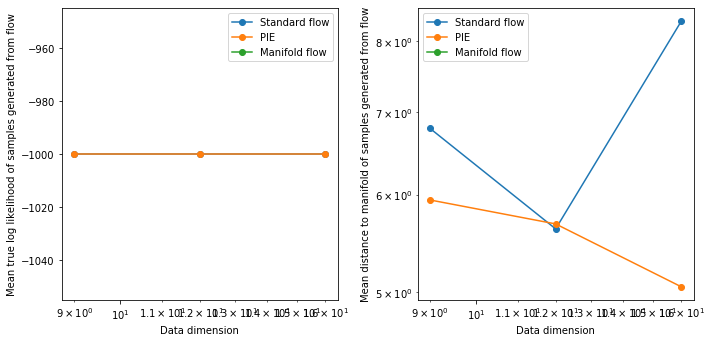

In [26]:
show = [3, 0, 4]
xs = [9, 12, 16]

fig = plt.figure(figsize=(10,5))

ax = plt.subplot(1,2,1)
for mean_logp_gen_, algo_label in zip(mean_logp_gen, algo_labels):
    print(mean_logp_gen_[show])
    plt.plot(xs, mean_logp_gen_[show], label=algo_label, ls="-", marker="o", ms=6.)
plt.legend()
plt.xscale("log")
plt.xlabel("Data dimension")
plt.ylabel("Mean true log likelihood of samples generated from flow")

ax = plt.subplot(1,2,2)
for mean_distance_gen_, algo_label in zip(mean_distance_gen, algo_labels):
    print(mean_distance_gen_[show])
    plt.plot(xs, mean_distance_gen_[show], label=algo_label, ls="-", marker="o", ms=6.)
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Data dimension")
plt.ylabel("Mean distance to manifold of samples generated from flow")

plt.tight_layout()
plt.savefig("../figures/log_likelihood_vs_dim_spherical_gaussian.pdf")


[-1000. -1000. -1000.]
[-1000. -1000. -1000.]
[nan nan nan]
[5.31720638 5.62886572 5.52731276]
[4.94769788 5.68120384 5.49142003]
[nan nan nan]


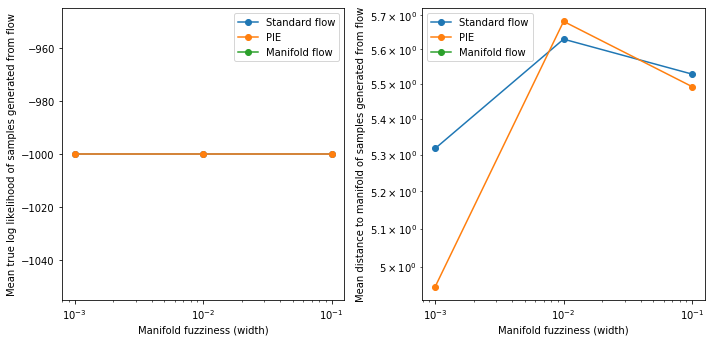

In [27]:
show = [1, 0, 2]
xs = [0.001, 0.01, 0.1]

fig = plt.figure(figsize=(10,5))

ax = plt.subplot(1,2,1)
for mean_logp_gen_, algo_label in zip(mean_logp_gen, algo_labels):
    print(mean_logp_gen_[show])
    plt.plot(xs, mean_logp_gen_[show], label=algo_label, ls="-", marker="o", ms=6.)
plt.legend()
plt.xscale("log")
plt.xlabel("Manifold fuzziness (width)")
plt.ylabel("Mean true log likelihood of samples generated from flow")

ax = plt.subplot(1,2,2)
for mean_distance_gen_, algo_label in zip(mean_distance_gen, algo_labels):
    print(mean_distance_gen_[show])
    plt.plot(xs, mean_distance_gen_[show], label=algo_label, ls="-", marker="o", ms=6.)
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Manifold fuzziness (width)")
plt.ylabel("Mean distance to manifold of samples generated from flow")

plt.tight_layout()
plt.savefig("../figures/log_likelihood_vs_epsilon_spherical_gaussian.pdf")
